# Generate Figures

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
DIR = "/workspace/nflbigdatabowl2023"
sys.path.append(DIR)

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from ast import literal_eval
from IPython.display import display

from src.visualization.interactive_pocket_area import (
    get_frame_plotter,
    get_play_pocket_and_timeline_plotter,
    get_play_pocket_and_timeline_plotter_multiple,
)
from src.visualization.formations import (
    plot_area_distributions,
    get_all_formation_distributions_plotter,
    get_clean_play_data,
    get_formation_distribution_plotter,
    get_play_metrics_with_area_data,
)
from src.visualization.helpers import unsnake
from src.visualization.logos import get_team_logos
from src.visualization.scatter import (
    get_team_scatter_plotter,
    get_team_scatter_ranker,
    plot_rankings
)

In [4]:
FIGPATH = "/workspace/nflbigdatabowl2023/data/figures"

In [5]:
team_logos = get_team_logos()

In [29]:
df_plays = pd.read_csv(f"{DIR}/data/raw/plays.csv")
df_plays = get_clean_play_data(df_plays)
df_tracking = pd.read_csv(f"{DIR}/data/processed/tracking_display.csv")
df_play_metrics = pd.read_csv(f"{DIR}/data/processed/play_metrics.csv")
df_play_metrics = get_play_metrics_with_area_data(df_play_metrics, df_plays)
df_areas = pd.read_csv(f"{DIR}/data/processed/pocket_areas.csv")
df_areas["pocket"] = df_areas["pocket"].apply(literal_eval)

## Figures

### Introduction

In [131]:
intro_query = (
    "passResult == 'IN' "
    "and down == 3 "
    "and yardsToGo > 5 "
    "and quarter == 4 "
    "and area_end <= 6 "
    "and dropBackType == 'TRADITIONAL' "
)
intro_cols = [
    "gameId",
    "playId",
    "area_start",
    "area_end",
    "passResult",
    "quarter",
    "down",
    "yardsToGo",
]
df_play_metrics.query(intro_query)[intro_cols].head()

,gameId,playId,area_start,area_end,passResult,quarter,down,yardsToGo
2758,2021091901,3691,20.621431,4.771950,IN,4,3,7
4998,2021092602,3580,17.373759,2.723000,IN,4,3,10
12268,2021101706,3502,17.930766,0.352068,IN,4,3,8
12269,2021101706,3502,32.726415,4.489497,IN,4,3,8
13732,2021102402,3008,17.058382,2.120000,IN,4,3,8


3 8 09:56
(9:56) (Shotgun) J.Wolford pass deep middle intended for C.Kupp INTERCEPTED by X.McKinney at NYG 47. X.McKinney to NYG 47 for no gain (R.Woods).


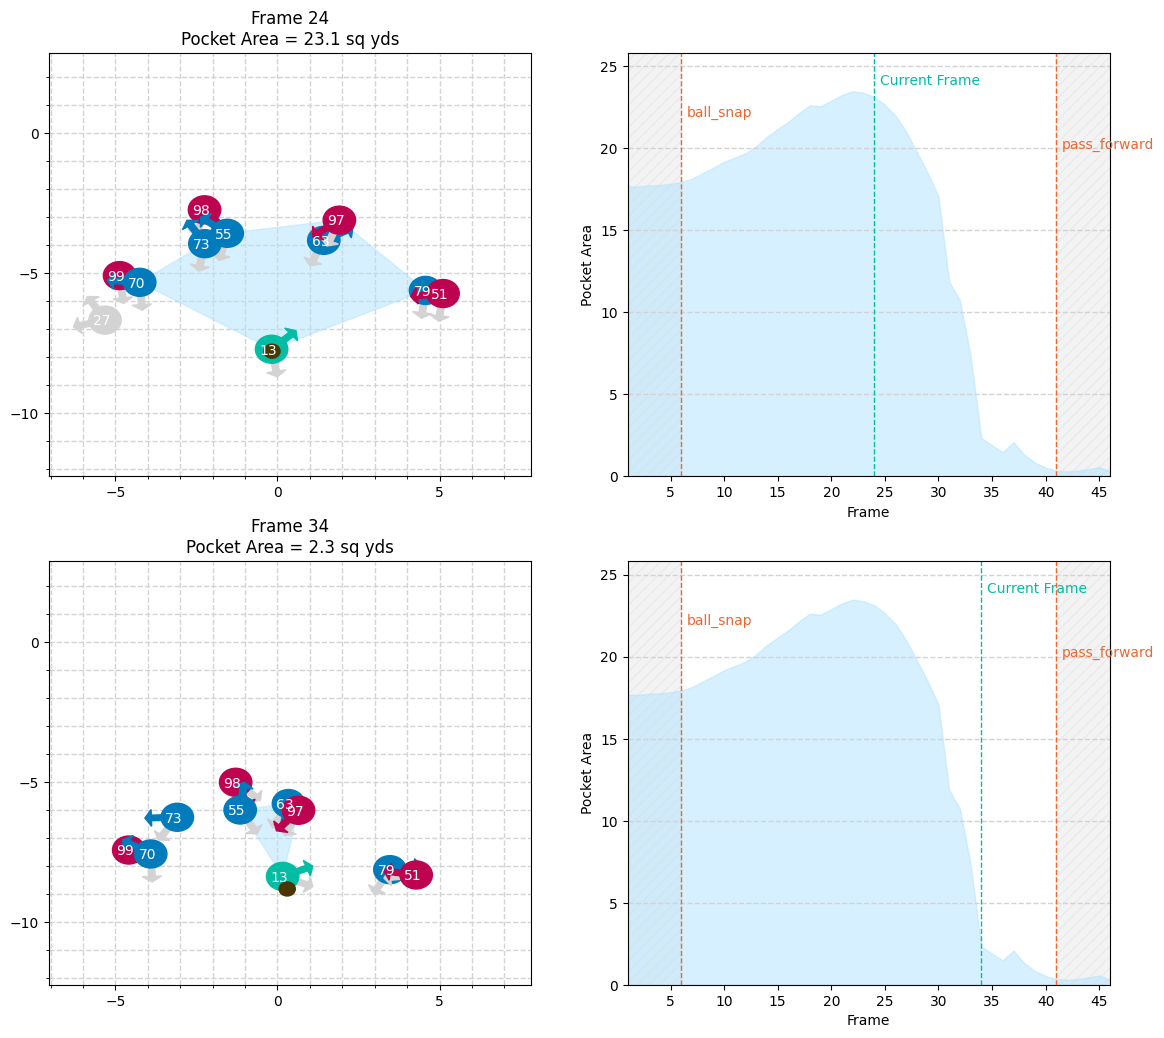

In [135]:
default_area = "adaptive_pocket_area"
play_query = "gameId == 2021101706 and playId == 3502"
play_meta = df_plays.query(play_query).iloc[0]
print(play_meta["down"], play_meta["yardsToGo"], play_meta["gameClock"])
print(play_meta["playDescription"])
plot_play_frame, viz_info = get_play_pocket_and_timeline_plotter_multiple(
    df_tracking.query(play_query),
    df_areas.query(play_query),
)
plot_play_frame(frame0=24, frame1=34, area_method=default_area)
plt.gcf().savefig(f"{FIGPATH}/figure_01.png")
plt.show()

### Voronoi

2 6 13:45
(13:45) (No Huddle) M.Ryan pass short right to C.Patterson to PHI 42 for 1 yard (D.Slay; A.Singleton).


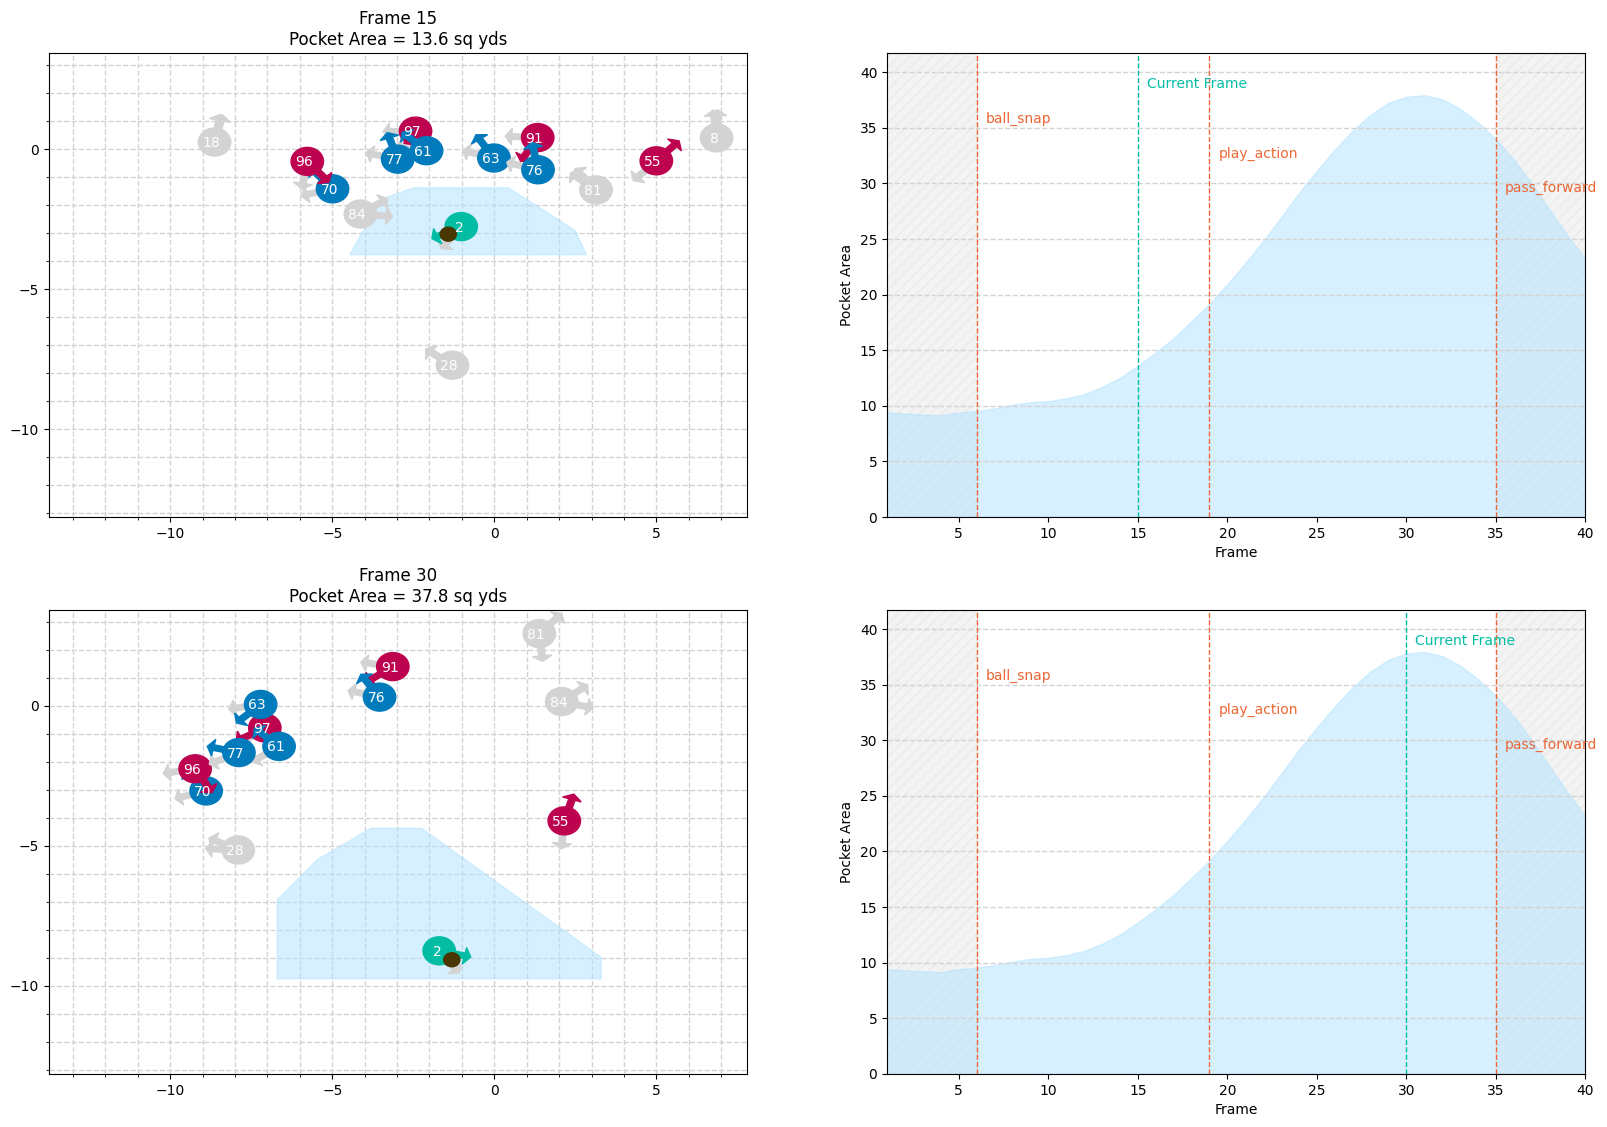

In [140]:
play_query = "gameId == 2021091200 and playId == 122"
play_meta = df_plays.query(play_query).iloc[0]
print(play_meta["down"], play_meta["yardsToGo"], play_meta["gameClock"])
print(play_meta["playDescription"])
plot_play_frame, viz_info = get_play_pocket_and_timeline_plotter_multiple(
    df_tracking.query(play_query),
    df_areas.query(play_query),
)
plot_play_frame(frame0=15, frame1=30, area_method="voronoi_rushers_only")
plt.gcf().savefig(f"{FIGPATH}/figure_02.png")
plt.show()

### Adaptive

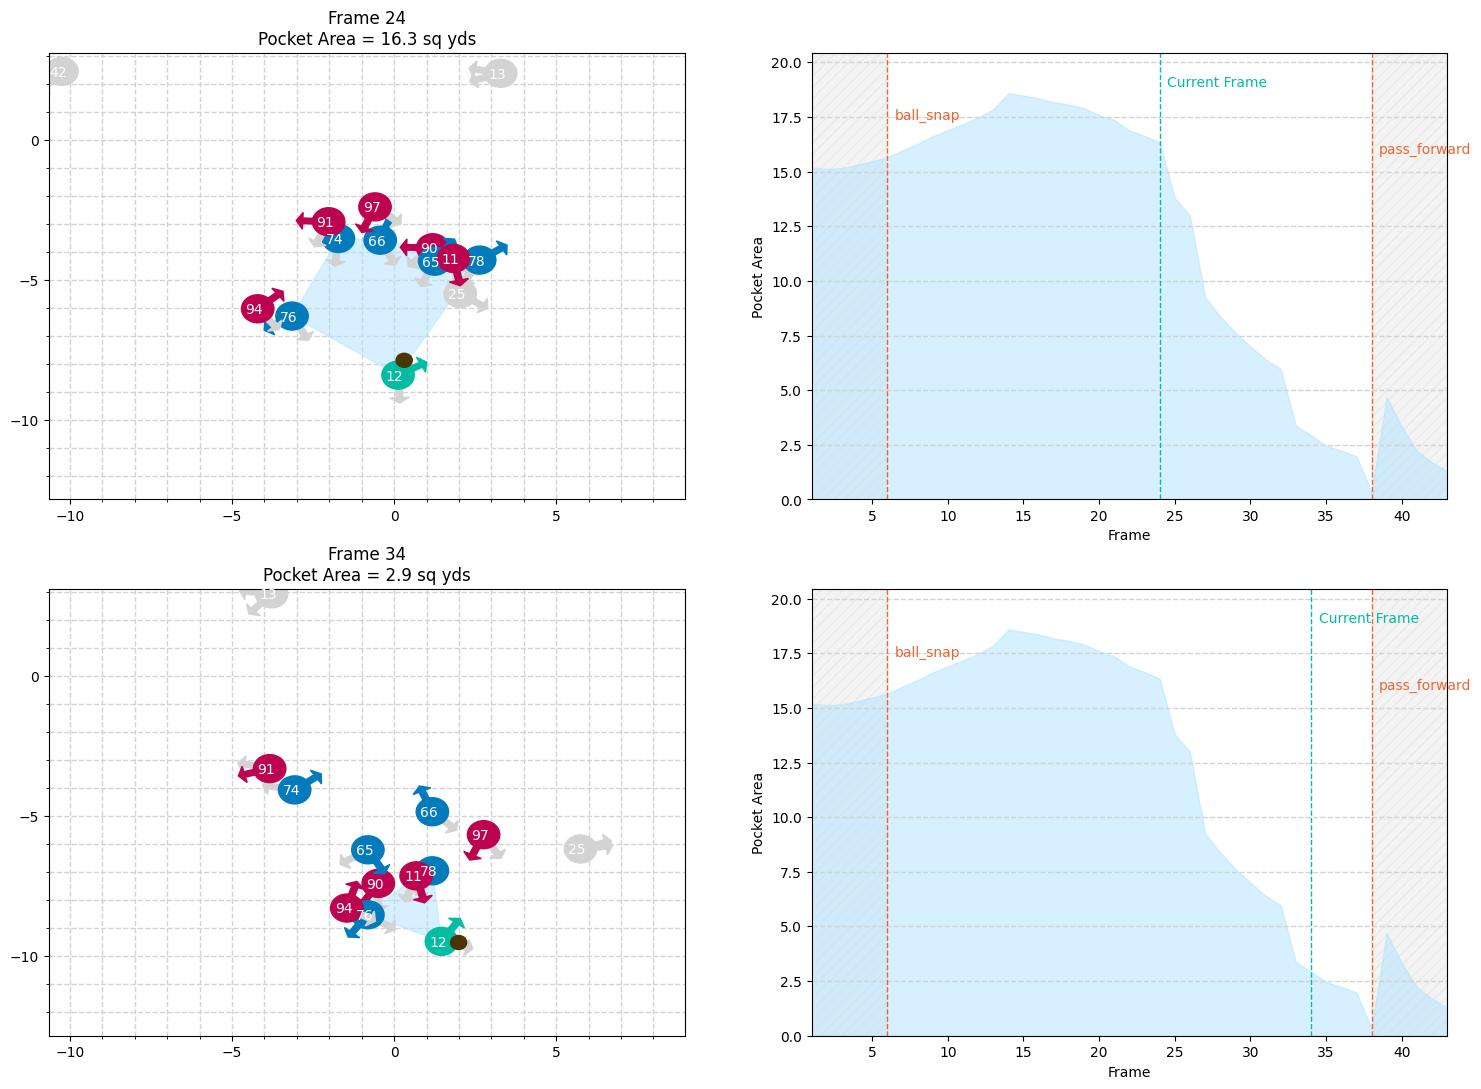

In [9]:
play_query = "gameId == 2021090900 and playId == 97"
plot_play_frame, viz_info = get_play_pocket_and_timeline_plotter_multiple(
    df_tracking.query(play_query),
    df_areas.query(play_query),
)
plot_play_frame(frame0=24, frame1=34, area_method="adaptive_pocket_area")
plt.gcf().savefig(f"{FIGPATH}/figure_03.png")
plt.show()

### Team Rankings

In [53]:
default_area = "adaptive_pocket_area"
formation_query = "'SHOTGUN', 'EMPTY', 'SINGLEBACK', 'I FORM'"
rank_team_scatter = get_team_scatter_ranker(df_play_metrics)
plot_team_scatter = get_team_scatter_plotter(df_play_metrics, team_logos)
df_team_ranking = rank_team_scatter(default_area, formation_query)
display(df_team_ranking)

,rank,team,plays,median_area,average_time_in_pocket,sack_rate,plays_opponent,median_area_opponent,average_time_in_pocket_opponent,sack_rate_opponent
0,1,KC,222,18.040250,2.724324,0.045045,184,16.285642,2.807609,0.048913
1,2,ARI,174,17.786499,2.867816,0.080460,205,16.721150,2.676585,0.058537
2,3,BAL,205,17.718000,3.029756,0.092683,207,15.716600,2.757971,0.067633
3,4,BUF,190,17.677122,2.961053,0.021053,172,16.035256,2.739535,0.069767
4,5,LA,203,17.488582,2.871429,0.034483,246,16.745434,2.709350,0.073171
5,6,GB,169,17.249450,2.756805,0.076923,220,16.632494,2.815455,0.063636
6,7,HOU,177,17.172550,2.687571,0.084746,175,16.150900,2.807429,0.062857
7,8,NO,148,17.134142,3.043243,0.067568,206,16.728066,2.893204,0.058252
8,9,CLE,187,16.976875,2.807487,0.101604,183,16.277875,2.721311,0.098361
9,10,CAR,223,16.866446,2.804484,0.076233,190,15.484012,2.682105,0.089474


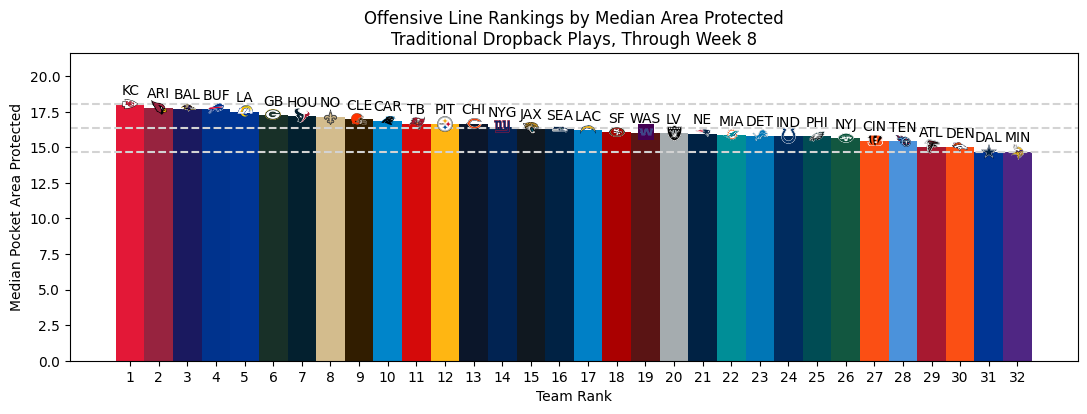

In [138]:
plot_rankings(df_team_ranking, team_logos, "median_area", ascending=False)
plt.gca().set_ylabel("Median Pocket Area Protected")
plt.gca().set_title(f"Offensive Line Rankings by Median Area Protected\nTraditional Dropback Plays, Through Week 8")
plt.gcf().savefig(f"{FIGPATH}/figure_04.png")
plt.show()

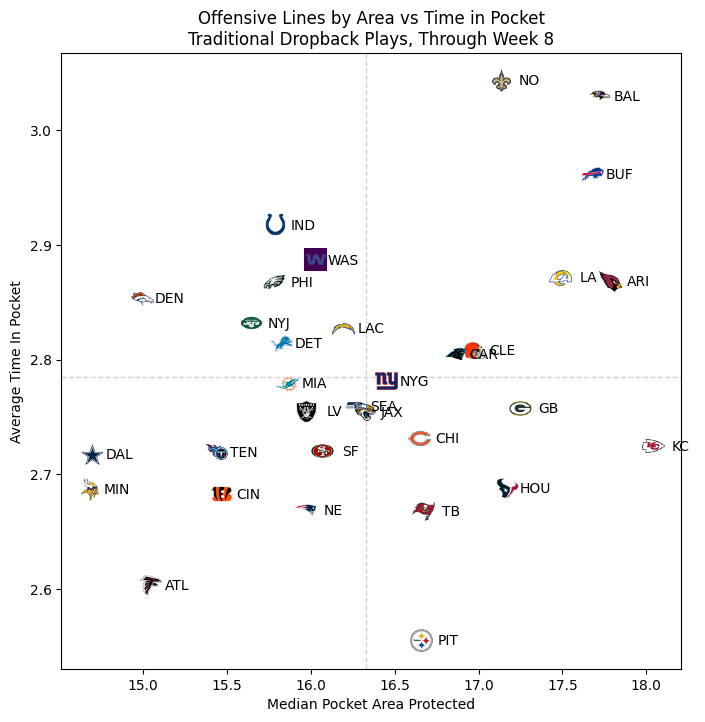

In [98]:
plot_team_scatter(default_area, formation_query, "median_area", "average_time_in_pocket")
plt.gca().set_xlabel("Median Pocket Area Protected")
plt.gca().set_title(f"Offensive Lines by Area vs Time in Pocket\nTraditional Dropback Plays, Through Week 8")
plt.gcf().savefig(f"{FIGPATH}/figure_05.png")
plt.show()

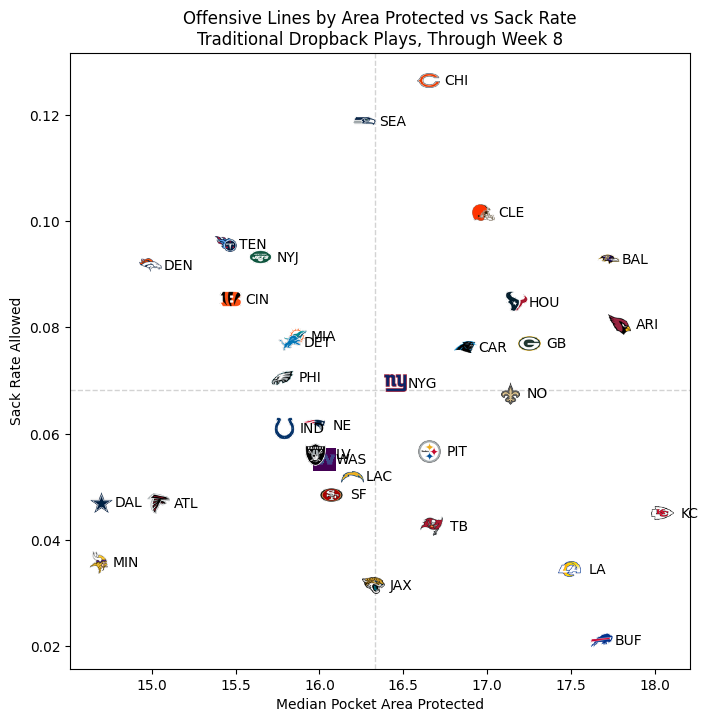

In [105]:
plot_team_scatter(default_area, formation_query, "median_area", "sack_rate")
plt.gca().set_xlabel("Median Pocket Area Protected")
plt.gca().set_ylabel("Sack Rate Allowed")
plt.gca().set_title(f"Offensive Lines by Area Protected vs Sack Rate\nTraditional Dropback Plays, Through Week 8")
plt.gcf().savefig(f"{FIGPATH}/figure_06.png")
plt.show()

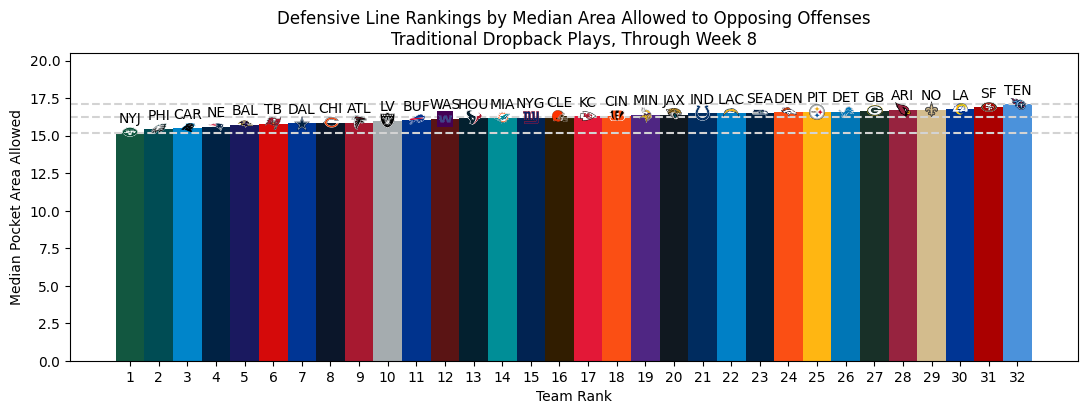

In [139]:
plot_rankings(df_team_ranking, team_logos, "median_area_opponent", ascending=True)
plt.gca().set_ylabel("Median Pocket Area Allowed")
plt.gca().set_title(f"Defensive Line Rankings by Median Area Allowed to Opposing Offenses\nTraditional Dropback Plays, Through Week 8")
plt.gcf().savefig(f"{FIGPATH}/figure_07.png")
plt.show()

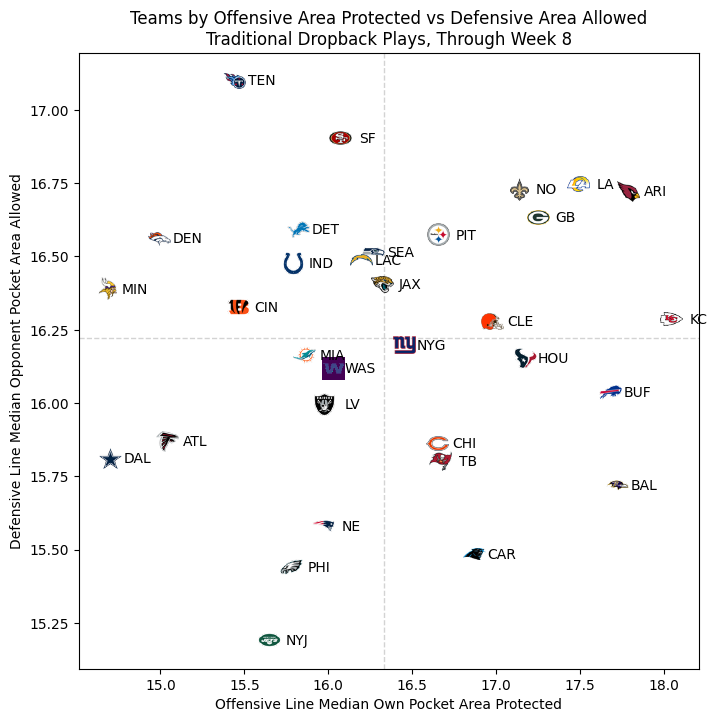

In [103]:
plot_team_scatter(default_area, formation_query, "median_area", "median_area_opponent")
plt.gca().set_xlabel("Offensive Line Median Own Pocket Area Protected")
plt.gca().set_ylabel("Defensive Line Median Opponent Pocket Area Allowed")
plt.gca().set_title(f"Teams by Offensive Area Protected vs Defensive Area Allowed\nTraditional Dropback Plays, Through Week 8")
plt.gcf().savefig(f"{FIGPATH}/figure_08.png")
plt.show()

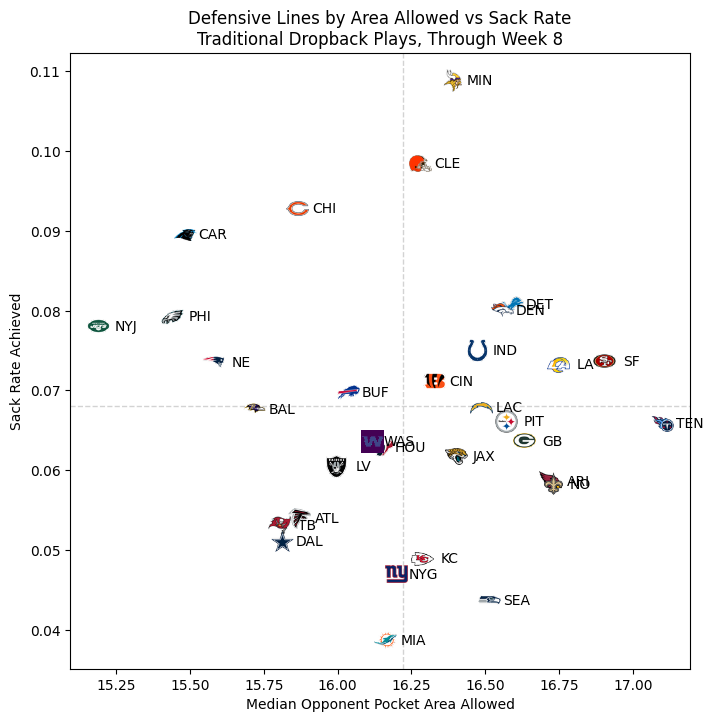

In [104]:
plot_team_scatter(default_area, formation_query, "median_area_opponent", "sack_rate_opponent")
plt.gca().set_xlabel("Median Opponent Pocket Area Allowed")
plt.gca().set_ylabel("Sack Rate Achieved")
plt.gca().set_title(f"Defensive Lines by Area Allowed vs Sack Rate\nTraditional Dropback Plays, Through Week 8")
plt.gcf().savefig(f"{FIGPATH}/figure_09.png")
plt.show()

### Heatmaps

In [17]:
from src.visualization.heatmaps import get_play_pocket, plot_heatmap

In [74]:
show_cols = [
    "gameId",
    "playId",
    "frameId",
    "method",
    "possessionTeam",
    "down",
    "yardsToGo",
]
df_pocket = get_play_pocket(df_play_metrics, df_areas, df_plays, window_size_frames=20)
df_pocket[show_cols].head(5)

,gameId,playId,frameId,method,possessionTeam,down,yardsToGo
0,2021090900,97,28,adaptive_pocket_area,TB,3,2
2,2021090900,137,22,adaptive_pocket_area,DAL,1,10
4,2021090900,187,16,adaptive_pocket_area,DAL,2,6
6,2021090900,282,28,adaptive_pocket_area,DAL,1,10
8,2021090900,349,22,adaptive_pocket_area,DAL,3,15


In [75]:
df_plays["dropBackType"].unique()

array(['TRADITIONAL', 'SCRAMBLE_ROLLOUT_RIGHT', 'DESIGNED_ROLLOUT_RIGHT',
       nan, 'SCRAMBLE', 'DESIGNED_ROLLOUT_LEFT', 'UNKNOWN',
       'DESIGNED_RUN', 'SCRAMBLE_ROLLOUT_LEFT'], dtype=object)

In [93]:
(
    df_plays
        .query("dropBackType in ('DESIGNED_ROLLOUT_LEFT', 'DESIGNED_ROLLOUT_RIGHT')")
        .groupby(["possessionTeam", "dropBackType"])
        ["playId"].count()
        .reset_index()
        .groupby(["possessionTeam"])
        .agg(count_type=("dropBackType", len), total_plays=("playId", sum))
        .reset_index()
        .query("count_type >= 2")
        .sort_values(by=["total_plays"], ascending=[False])
)

,possessionTeam,count_type,total_plays
15,KC,2,22
23,NYG,2,22
9,DEN,2,22
19,MIA,2,21
16,LA,2,21
20,MIN,2,19
14,JAX,2,18
8,DAL,2,18
27,SEA,2,17
10,DET,2,17


In [76]:
df_plays["pff_playAction"].unique()

array([0, 1])

Found 217 plays for query.


  0%|          | 0/1681 [00:00<?, ?it/s]

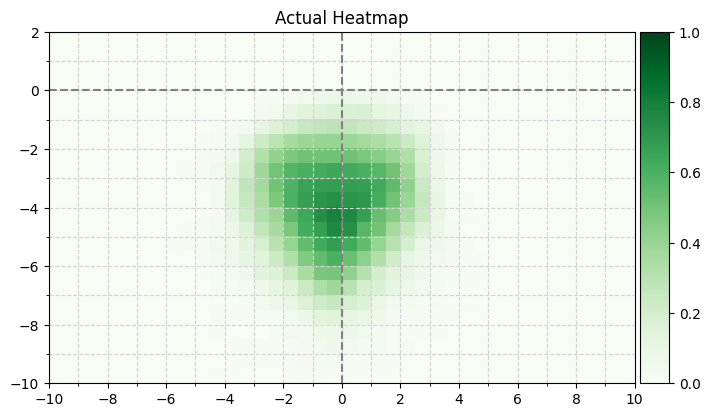

In [94]:
heatmap_query = (
    "possessionTeam == 'KC' "
    "and dropBackType == 'TRADITIONAL' "
)
df_pocket_query = df_pocket.query(heatmap_query)
print(f"Found {len(df_pocket_query)} plays for query.")
plot_heatmap(
    df_pocket_query,
    area_method="adaptive_pocket_area",
    bin_start=-10,
    bin_end=10,
    bin_size=0.5,
)
plt.gcf().savefig(f"{FIGPATH}/figure_09.png")
plt.show()

Found 8 plays for query.


  0%|          | 0/1681 [00:00<?, ?it/s]

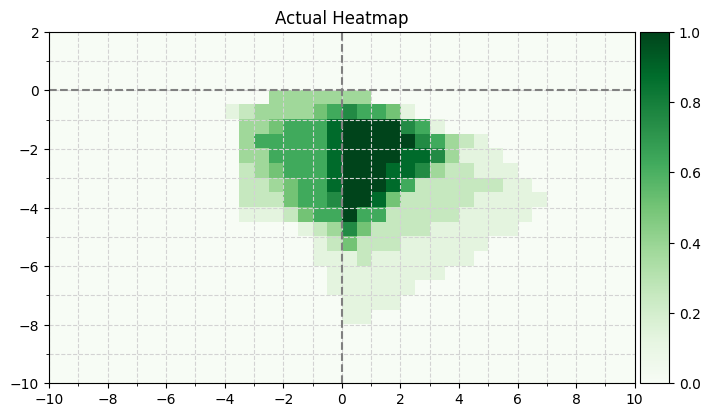

In [95]:
heatmap_query = (
    "possessionTeam == 'KC' "
    "and dropBackType == 'DESIGNED_ROLLOUT_LEFT' "
)
df_pocket_query = df_pocket.query(heatmap_query)
print(f"Found {len(df_pocket_query)} plays for query.")
plot_heatmap(
    df_pocket_query,
    area_method="adaptive_pocket_area",
    bin_start=-10,
    bin_end=10,
    bin_size=0.5,
)
plt.gcf().savefig(f"{FIGPATH}/figure_09.png")
plt.show()

Found 14 plays for query.


  0%|          | 0/1681 [00:00<?, ?it/s]

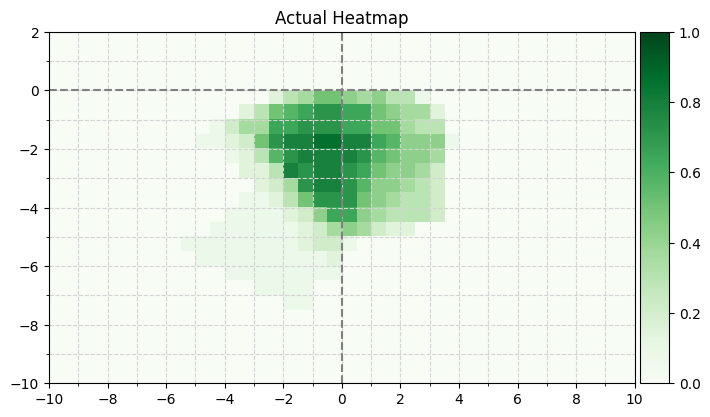

In [96]:
heatmap_query = (
    "possessionTeam == 'KC' "
    "and dropBackType == 'DESIGNED_ROLLOUT_RIGHT' "
)
df_pocket_query = df_pocket.query(heatmap_query)
print(f"Found {len(df_pocket_query)} plays for query.")
plot_heatmap(
    df_pocket_query,
    area_method="adaptive_pocket_area",
    bin_start=-10,
    bin_end=10,
    bin_size=0.5,
)
plt.gcf().savefig(f"{FIGPATH}/figure_09.png")
plt.show()

### Appendix

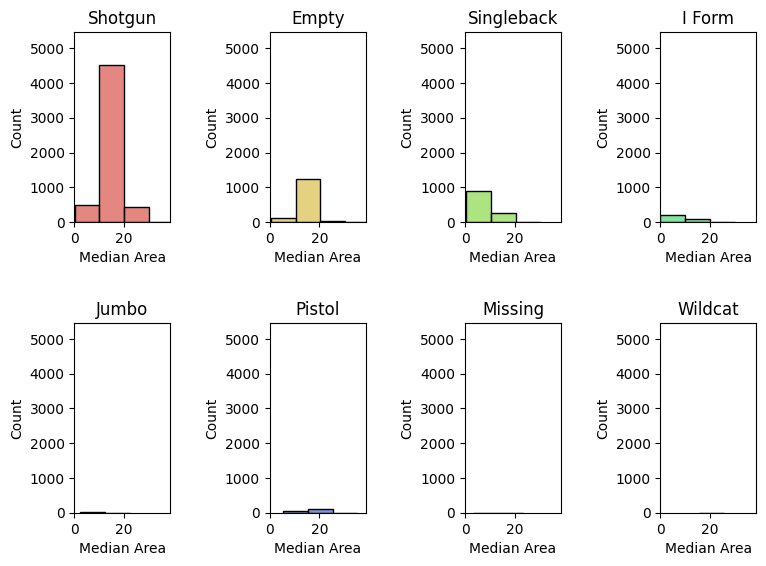

In [21]:
formations = list(df_play_metrics["offenseFormation"].unique())
plot_all_formation_distributions = get_all_formation_distributions_plotter(df_play_metrics, formations)
plot_all_formation_distributions(default_area)
plt.gcf().savefig(f"{FIGPATH}/appendix_01.png")
plt.show()

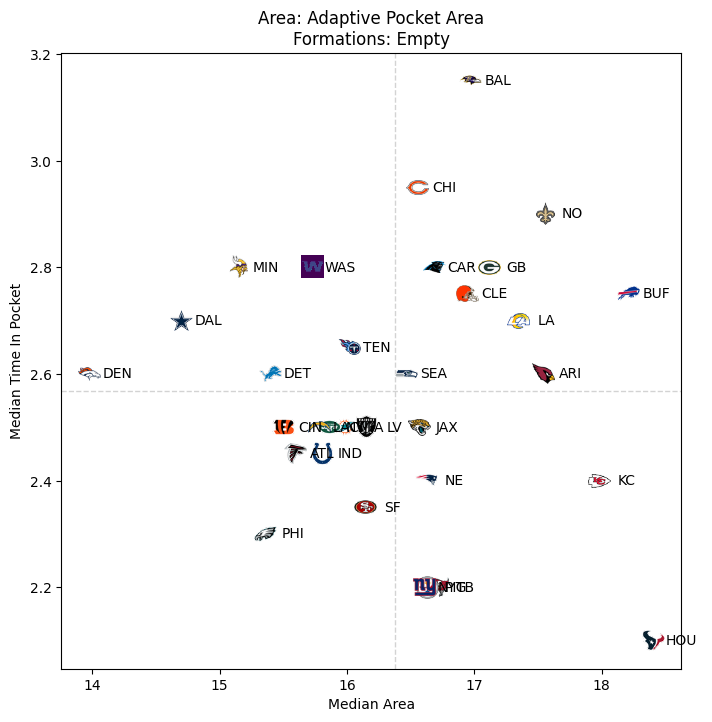

In [22]:
plot_team_scatter(default_area, "'EMPTY'", "median_area", "median_time_in_pocket")
plt.gcf().savefig(f"{FIGPATH}/appendix_02.png")
plt.show()